In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_csv("cleaned_employees_dataset.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
1,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
2,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
3,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
4,46232,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16047,57239,Sales & Marketing,region_31,Bachelors,m,other,1,42,3.0,10,0,0,53
16048,73858,Sales & Marketing,region_25,Bachelors,m,sourcing,2,28,2.0,5,0,0,45
16049,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
16050,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [33]:
# Shape & Unique Values

df.info()
df.describe()
print()
print(f"Shape: {df.shape}")
df.nunique()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16052 entries, 0 to 16051
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            16052 non-null  int64  
 1   department             16052 non-null  object 
 2   region                 16052 non-null  object 
 3   education              15422 non-null  object 
 4   gender                 16052 non-null  object 
 5   recruitment_channel    16052 non-null  object 
 6   no_of_trainings        16052 non-null  int64  
 7   age                    16052 non-null  int64  
 8   previous_year_rating   16052 non-null  float64
 9   length_of_service      16052 non-null  int64  
 10  KPIs_met_more_than_80  16052 non-null  int64  
 11  awards_won             16052 non-null  int64  
 12  avg_training_score     16052 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.6+ MB

Shape: (16052, 13)


employee_id              16051
department                   9
region                      34
education                    3
gender                       2
recruitment_channel          3
no_of_trainings              9
age                         41
previous_year_rating         5
length_of_service           34
KPIs_met_more_than_80        2
awards_won                   2
avg_training_score          61
dtype: int64

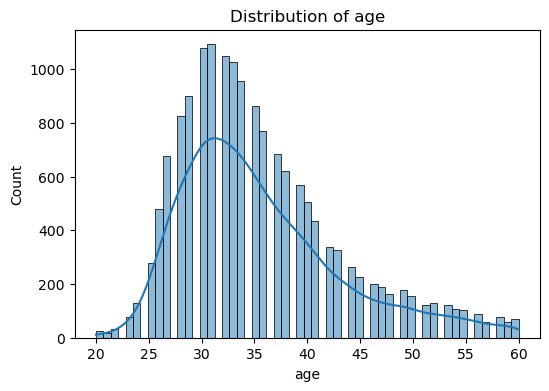

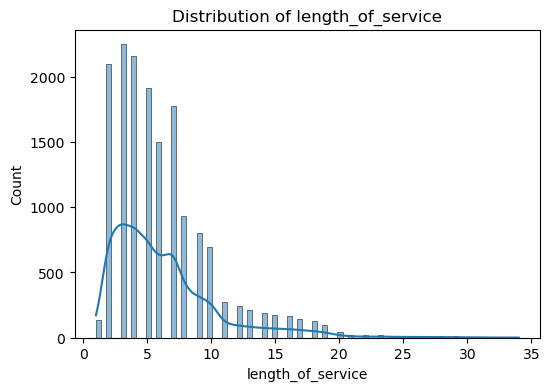

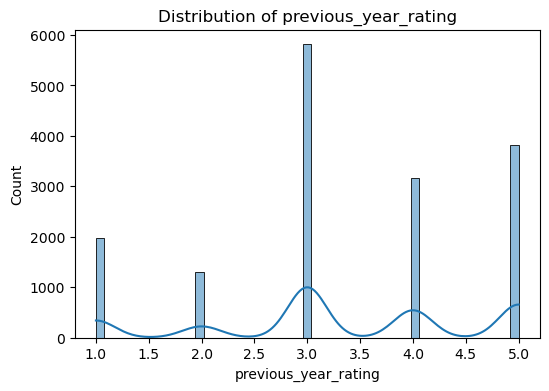

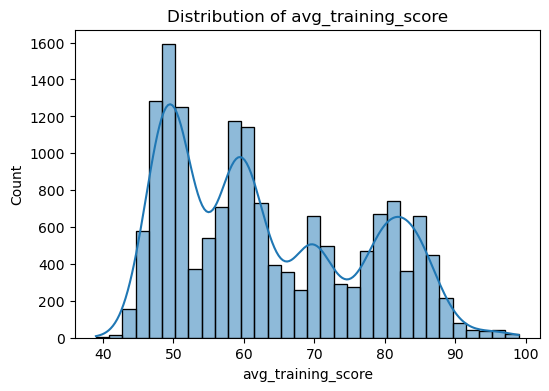

In [34]:
# Target & Feature Distribution
numerical_features = ['age', 'length_of_service', 'previous_year_rating', 'avg_training_score']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

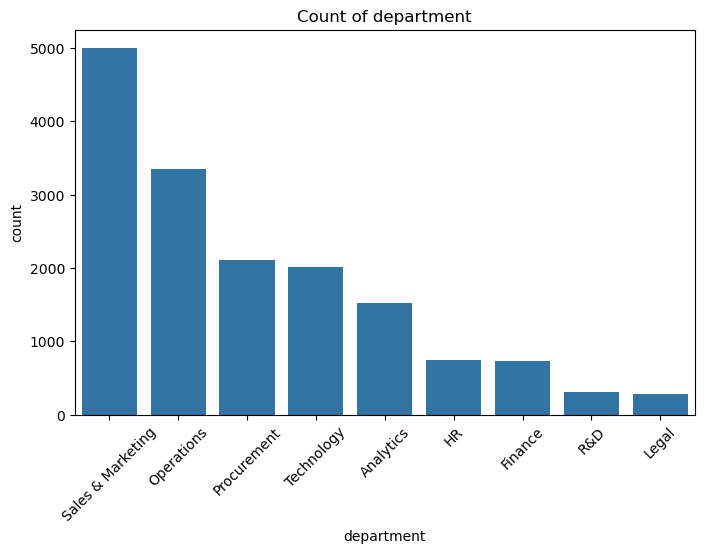

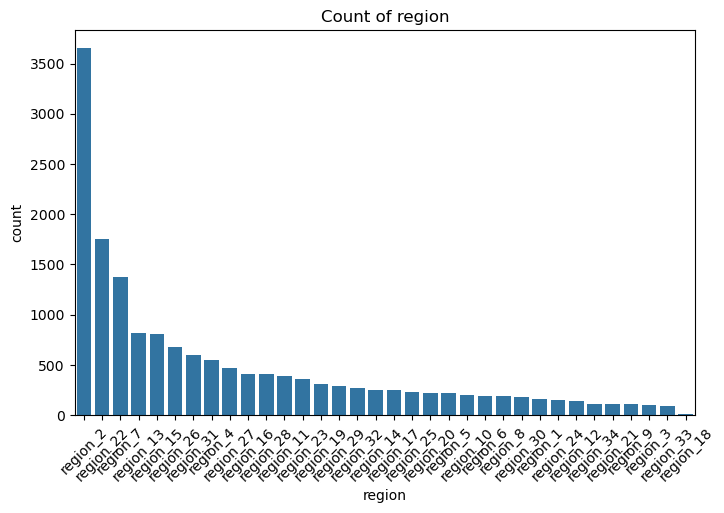

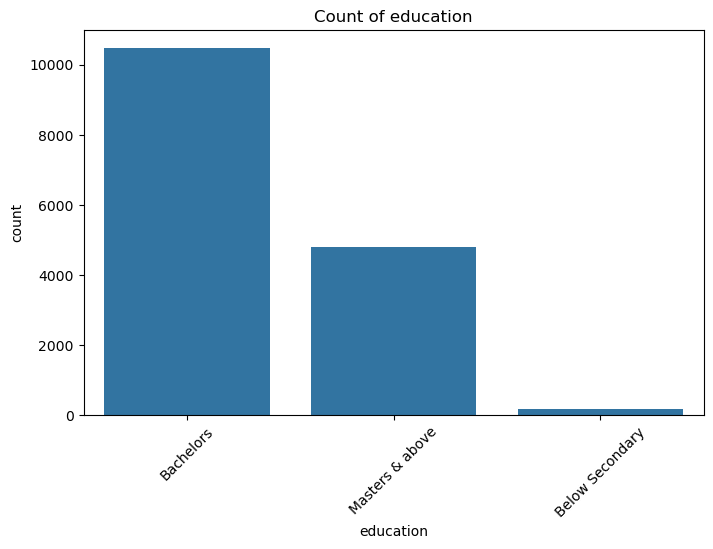

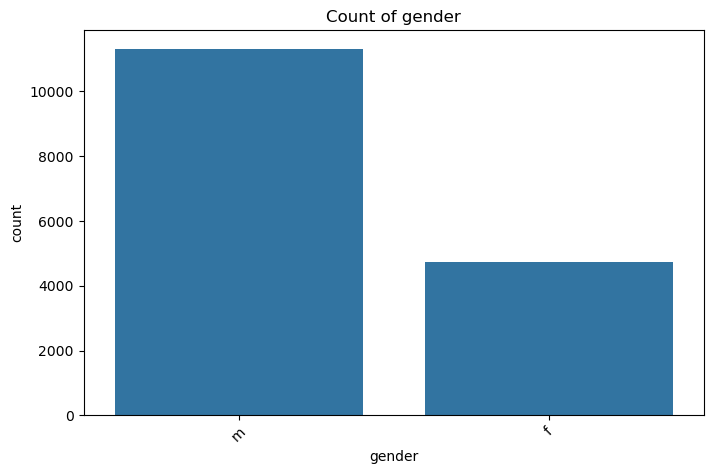

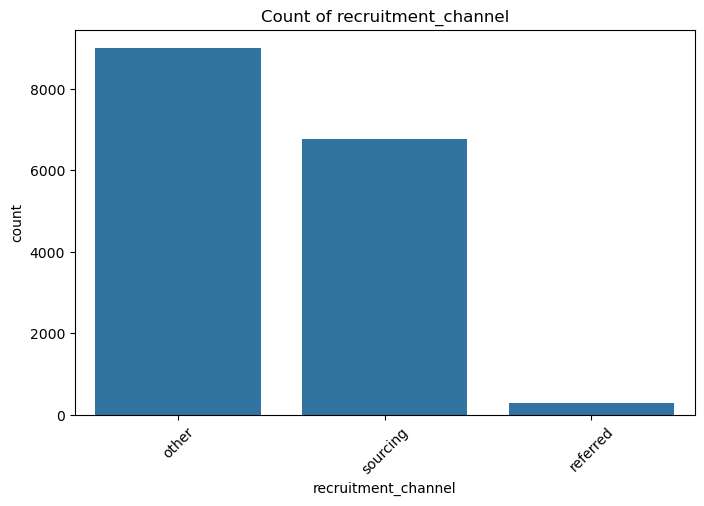

In [35]:
 # Categorical Feature Insights
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for col in categorical_features:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.show()


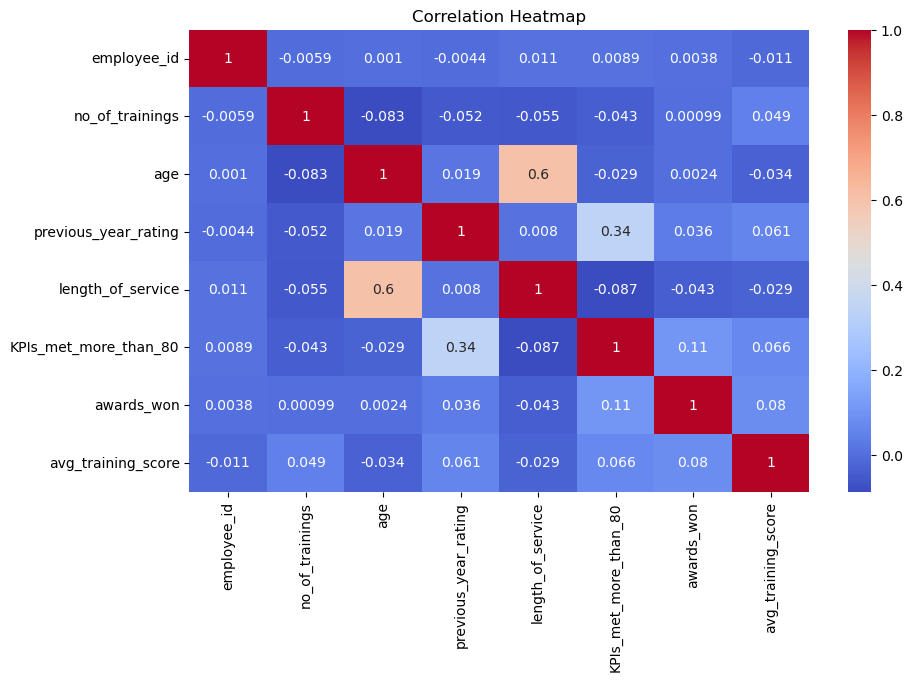

In [36]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


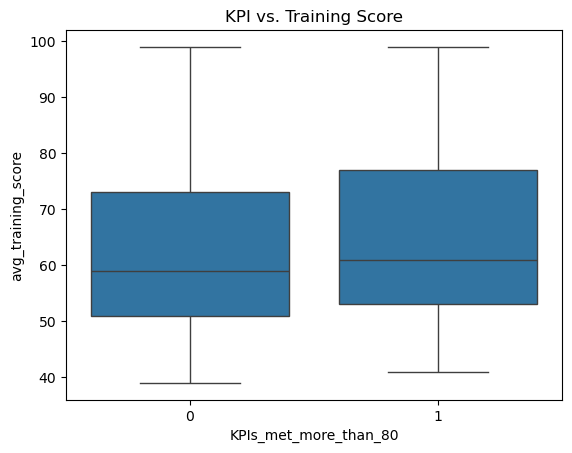

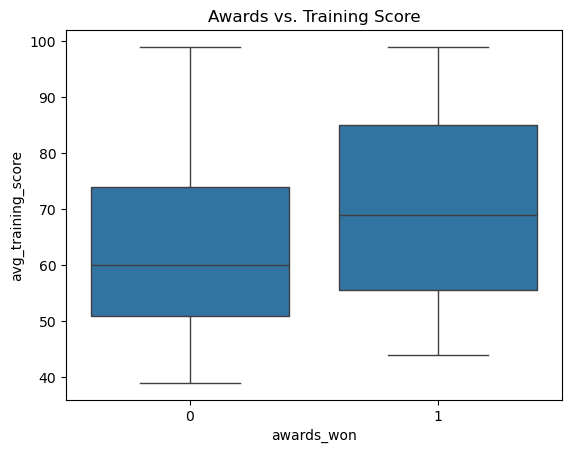

In [37]:
# KPI & Awards Patterns
sns.boxplot(data=df, x='KPIs_met_more_than_80', y='avg_training_score')
plt.title("KPI vs. Training Score")
plt.show()

sns.boxplot(data=df, x='awards_won', y='avg_training_score')
plt.title("Awards vs. Training Score")
plt.show()


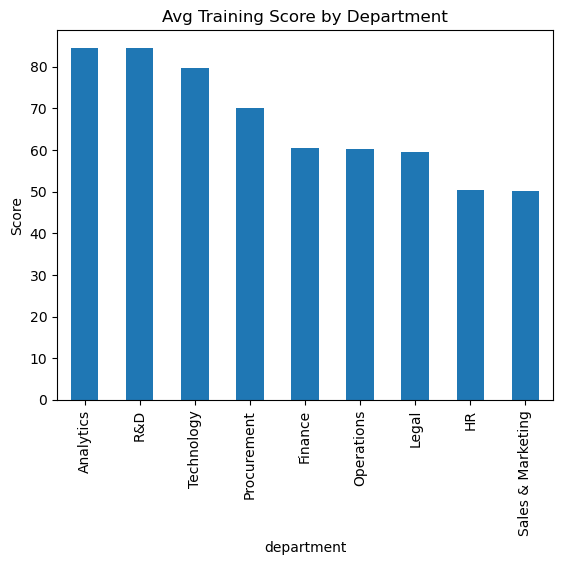

In [38]:
# Grouped Averages
df.groupby('department')['avg_training_score'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Avg Training Score by Department')
plt.ylabel('Score')
plt.show()


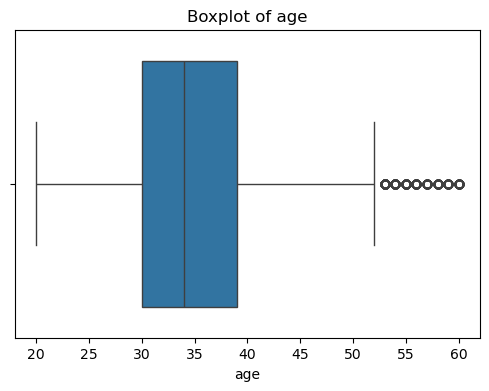

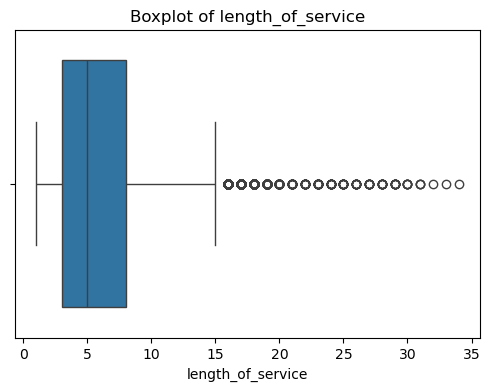

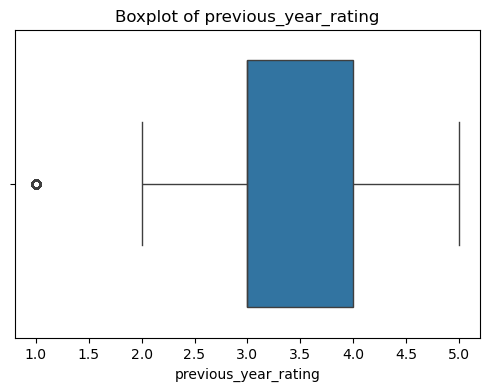

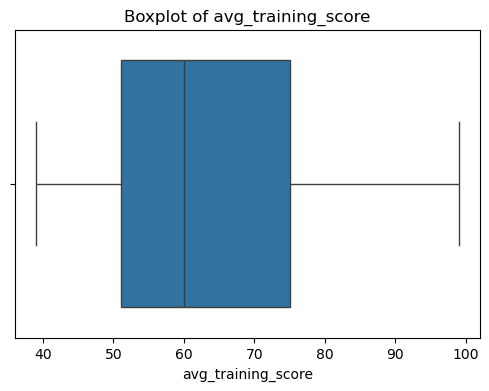

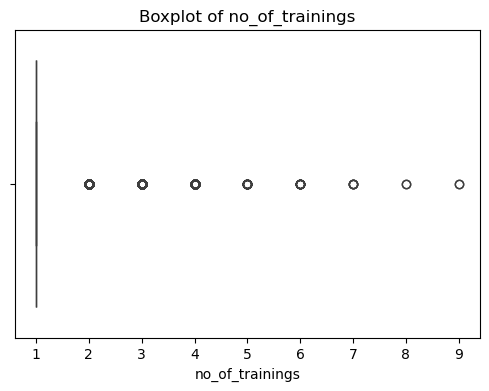

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['age', 'length_of_service', 'previous_year_rating', 'avg_training_score', 'no_of_trainings']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [40]:
# Outlier Summary Table(before)
def count_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].shape[0]

{col: count_outliers(col) for col in numerical_columns}

{'age': 680,
 'length_of_service': 720,
 'previous_year_rating': 1974,
 'avg_training_score': 0,
 'no_of_trainings': 3043}

In [41]:
# Calculating Outlier Cap Values (Using IQR)
def get_caps(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return col, round(lower, 2), round(upper, 2)
    

for col in ['age', 'length_of_service', 'previous_year_rating', 'no_of_trainings']:
    print(get_caps(col))


('age', 16.5, 52.5)
('length_of_service', -4.5, 15.5)
('previous_year_rating', 1.5, 5.5)
('no_of_trainings', 1.0, 1.0)


In [42]:
# Apply Capping to Limit Outliers
def cap_column(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

for col in ['age', 'length_of_service', 'previous_year_rating', 'no_of_trainings']:
    cap_column(col)



In [43]:
# Outlier Summary Table(after)
def count_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)].shape[0]

{col: count_outliers(col) for col in numerical_columns}


{'age': 0,
 'length_of_service': 0,
 'previous_year_rating': 0,
 'avg_training_score': 0,
 'no_of_trainings': 0}